##### 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#mglearn에서 쓰이는 가상의 데이터(조작이 되어 있음): 의미없는 값들
X, y = mglearn.datasets.make_wave(n_samples=60)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#       어떠한 하이퍼파라미터도 받지 않는다.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- model.score(X_test, y_test)
- 결정계수 = R제곱 통계량 = Coefficient of Determination = R^2 =Rsqured
- 결정계수란 = '회귀 모델의 성과 지표'
    - 1에 가까울 수록 좋은 회귀 모델
    - 0에 가까울 수록 나쁜 모델
    - 음수가 나올경우, 바로 폐기해야 하는 모델
- 만약 우리가 타겟 데이터의 평균값을 예측하는 모델을 쓴다면, 편차는 항상 오차와 동일하기 때문에 결정계수(R^2)는 =0 이 된다.(분모와 분자가 같기 때문)
 
- 오차가 편차보다 커서 결정계수의 값이 음수가 된다면 이는 회귀모델의 성능이 평균값으로 예측하는 값보다 결과가 좋지 않음을 의미한다.

- 결정계수의 공식: (예측값에 대한 편차)의 제곱의 총합 / 편차의 제곱의 총합이 된다. 곧 예측값에 대한 분산/실제 값에 대한 분산 식이라고 볼 수 있는 것이다.

In [4]:
#Rsqured값: 높을수록 좋음
model.score(X_test, y_test)

0.6932519118518163

In [5]:
#회귀계수
model.coef_

array([0.44153666])

In [6]:
#y절편
model.intercept_

-0.01711124414733381

- y=βx+a -> 피팅완료 -> y=0.44x-0.017
- -1.80195731*0.44153666+(-0.01711124414733381) = predict(X_test)

In [7]:
X_test

array([[-1.80195731],
       [ 1.85038409],
       [-1.04801802],
       [ 0.55448741],
       [ 2.81945911],
       [ 1.39196365],
       [ 2.7937922 ],
       [-2.72863627],
       [-2.26777059],
       [-1.24713211],
       [-2.06388816],
       [-2.87649303],
       [ 0.64526911],
       [-0.02893854],
       [ 2.69331322]])

In [8]:
model.predict(X_test)

array([-0.81274146,  0.79990117, -0.47984962,  0.22771528,  1.22778333,
        0.59749174,  1.21645044, -1.2219042 , -1.01841511, -0.5677658 ,
       -0.92839354, -1.28718838,  0.26779873, -0.02988867,  1.17208529])

In [9]:
[model.coef_+x+model.intercept_ for x in X_test]

[array([-1.37753189]),
 array([2.27480951]),
 array([-0.62359259]),
 array([0.97891283]),
 array([3.24388453]),
 array([1.81638907]),
 array([3.21821762]),
 array([-2.30421085]),
 array([-1.84334517]),
 array([-0.82270669]),
 array([-1.63946274]),
 array([-2.45206761]),
 array([1.06969453]),
 array([0.39548688]),
 array([3.11773864])]

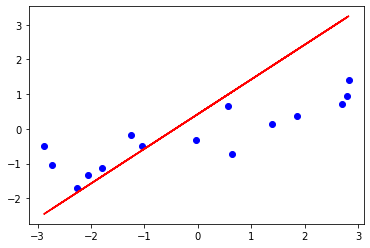

In [10]:
"""
for i in X_test:
    print(model.coef_+i+model.intercept_)
"""
#plt.plot(X_test, model.predict(X_test), c="r")
plt.plot(X_test, [model.coef_+x+model.intercept_ for x in X_test], c="r")
plt.scatter(X_test, y_test, c="b")

##### 릿지

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#             규제의 강도: 알파값 지정(알파값이 커지면 규제의 효과가 커짐(과대적합 감소, 오차 증가))
model = Ridge(alpha = 1)
model.fit(X_train, y_train)

Ridge(alpha=1)

In [14]:
#Rsqured값: 높을수록 좋음
model.score(X_test, y_test)

0.6955387463979459

In [15]:
#회귀계수
model.coef_

array([0.43835808])

In [16]:
#y절편
model.intercept_

-0.01784482961810112

##### 라소

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [18]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#             규제의 강도: 알파값 지정(알파값이 작아지면 규제의 효과가 작아짐(과대적합 증가, 오차감소->알파 값이 0이 되면 선형회귀와 같음))
model = Lasso(alpha = 0)
model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_7872\816301525.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.950e+00, tolerance: 4.079e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

In [20]:
#Rsqured값: 높을수록 좋음
model.score(X_test, y_test)

0.6932519118518164

In [21]:
#회귀계수
model.coef_

array([0.44153666])

In [22]:
#y절편
model.intercept_

-0.017111244147333837

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

In [25]:
cancer= load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
pd.DataFrame(cancer["data"])


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
X=pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
y=pd.DataFrame(cancer["target"], columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [41]:
for a, i in enumerate(cancer["target_names"]):
    y["target"]=y["target"].replace(a, i)

In [42]:
y

,target
0,malignant
1,malignant
2,malignant
3,malignant
4,malignant
...,...
564,malignant
565,malignant
566,malignant
567,malignant


In [43]:
df=pd.concat([X, y], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [48]:
y=pd.DataFrame(cancer["target"], columns=["target"])
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0
